In [20]:
import requests
import pandas as pd
from tqdm import tqdm_notebook
URL = 'https://api.github.com/repos/matplotlib/matplotlib'

In [21]:
contrib = []
for p, _ in enumerate(tqdm_notebook(range(0,828,100))):
    r = requests.get(f'{URL}/contributors', params={'page':p+1, 'per_page':100, 'anon':True})
    contrib.extend(r.json())

In [22]:
r.status_code

200

In [23]:
cdf = pd.io.json.json_normalize(contrib)

In [24]:
cdf['contributions'].describe()

count     900.000000
mean       33.981111
std       244.893236
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      4463.000000
Name: contributions, dtype: float64

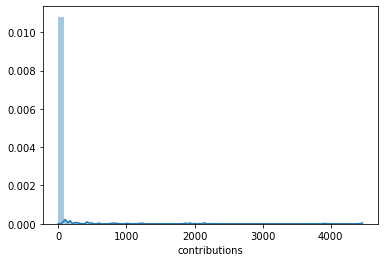

In [25]:
# distribution of contributor commit counts 
%matplotlib inline
import seaborn as sns
_ = sns.distplot(cdf['contributions'])

In [26]:
pulls = []
for p, _ in enumerate(tqdm_notebook(range(0,9042,100))):
    r = requests.get(f'{URL}/pulls', params={'page':p+1, 'per_page':100, 'state':'all'})
    pulls.extend(r.json())

In [27]:
pdf = pd.io.json.json_normalize(pulls)

AttributeError: 'str' object has no attribute 'items'

In [35]:
dfs = []
for p in tqdm_notebook(pulls):
    try:
        df = pd.io.json.json_normalize(p)
        dfs.append(df)
    except AttributeError as e:
        print(e, p)

'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has no attribute 'values' documentation_url
'str' object has no attribute 'values' message
'str' object has 

In [36]:
pdf = pd.concat(dfs)

/home/hannah/miniconda3/envs/mpl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [38]:
#https://developer.github.com/v3/pulls/#list-pull-requests
"state": "open",
"created_at": "2011-01-26T19:01:12Z",
"closed_at": "2011-01-26T19:01:12Z",
"merged_at": "2011-01-26T19:01:12Z",
pdf.columns,

Index(['_links.comments.href', '_links.commits.href', '_links.html.href',
       '_links.issue.href', '_links.review_comment.href',
       '_links.review_comments.href', '_links.self.href',
       '_links.statuses.href', 'assignee', 'assignee.avatar_url',
       ...
       'user.login', 'user.node_id', 'user.organizations_url',
       'user.received_events_url', 'user.repos_url', 'user.site_admin',
       'user.starred_url', 'user.subscriptions_url', 'user.type', 'user.url'],
      dtype='object', length=335)

In [39]:
psub = pdf[['user.login', 'state', 'created_at', 'closed_at', 'merged_at']]

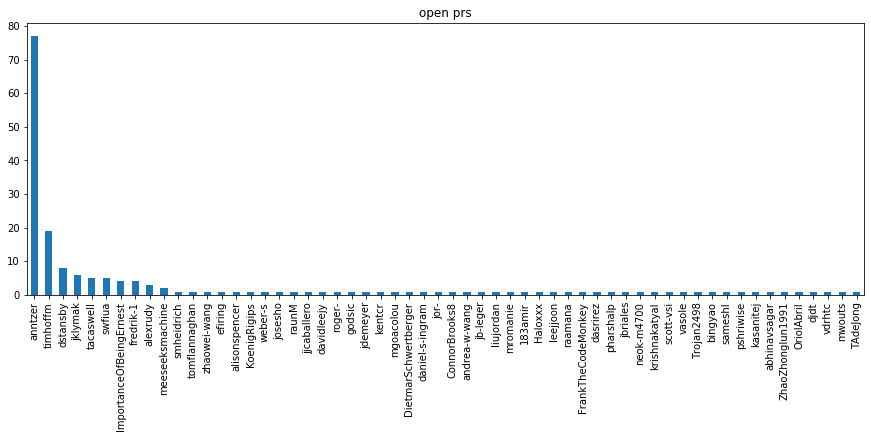

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("open prs")
_ = psub[(psub['created_at']>'2018-07-17') & 
         psub['state'].str.match('open')]['user.login'].value_counts().plot.bar(ax=ax)

In [66]:
merge_rate = pd.to_datetime(psub['merged_at']) - pd.to_datetime(psub['created_at'])
merge_rate.describe()

count                       4341
mean     12 days 04:22:55.410504
std      43 days 08:00:06.731297
min              0 days 00:01:47
25%              0 days 04:17:42
50%              0 days 19:23:04
75%              4 days 21:42:41
max            684 days 06:26:50
dtype: object

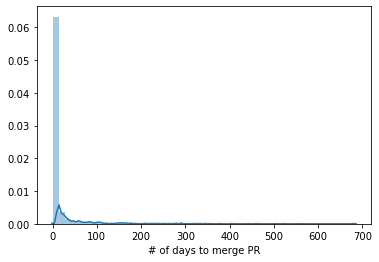

In [87]:
fig, ax = plt.subplots()
_ = sns.distplot(merge_rate.dropna(how='all').dt.days, ax=ax)
_ = ax.set_xlabel("# of days to merge PR")